In [1]:
import torch

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

from dataset import HandGestureDataset
from model import HandGestureModel

In [2]:
model = HandGestureModel()
model.load_state_dict(torch.load('./models/2024-03-09-5/model.pt'))
model.eval()

val_dataset = HandGestureDataset(data_path='../data/dataset.json', dataset='test')

/var/folders/gf/336n9v21459921q47mryp1t40000gn/T/ipykernel_26833/18863430.py:5: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)
  pred = model(torch.tensor([input]))


              precision    recall  f1-score   support

           0     0.8429    1.0000    0.9147       177
           1     1.0000    0.8608    0.9252       194
           2     1.0000    0.9744    0.9870       156
           3     1.0000    0.9868    0.9933       151

    accuracy                         0.9513       678
   macro avg     0.9607    0.9555    0.9551       678
weighted avg     0.9590    0.9513    0.9519       678



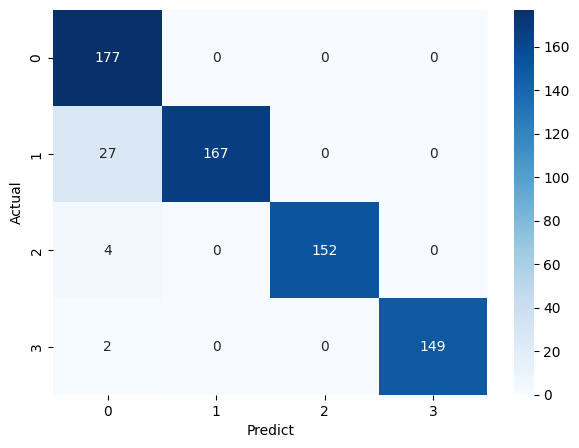

In [3]:
y_pred = []
y_true = []

for input, label in val_dataset:
    pred = model(torch.tensor([input]))
    y_pred.append(pred.argmax().item())
    y_true.append(label.argmax().item())

print(classification_report(y_true, y_pred, digits=4))
plt.figure(figsize=(7, 5))
ax = sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='Blues', fmt='g')
ax.set(xlabel='Predict', ylabel='Actual')
plt.show()